### Step 1: Setup

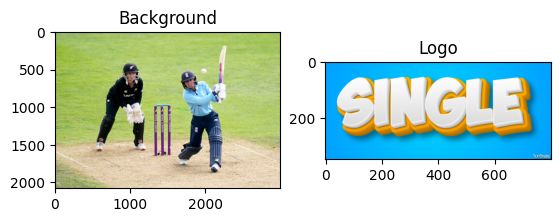

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images of the same or similar size
#img1 = cv2.imread('background.png')
img1 = cv2.imread('cricket-batter.jpg')
img2 = cv2.imread('single-logo.png')

# Convert from BGR → RGB for Matplotlib
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1); plt.imshow(img1); plt.title("Background")
plt.subplot(1,2,2); plt.imshow(img2); plt.title("Logo")
plt.show()


### 🧩 Step 2: Pasting One Image onto Another

You can copy a region (ROI) from one image and paste it onto another.

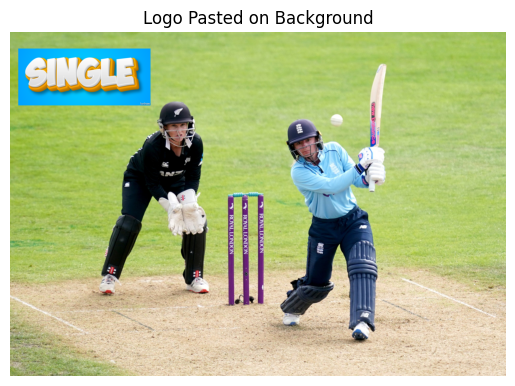

In [29]:
# Get image sizes
rows, cols, channels = img2.shape   # Logo.

# Choose top-left corner for placement
x, y = 50, 100

# Replace ROI in background
roi = img1[y:y+rows, x:x+cols]  # Background image.
img1[y:y+rows, x:x+cols] = img2

plt.imshow(img1)
plt.title("Logo Pasted on Background")
plt.axis('off')
plt.show()


### 🧩 Step 3: Pasting with Transparency (Masking)

If your logo has a white or transparent background, you can create a mask to blend it cleanly.

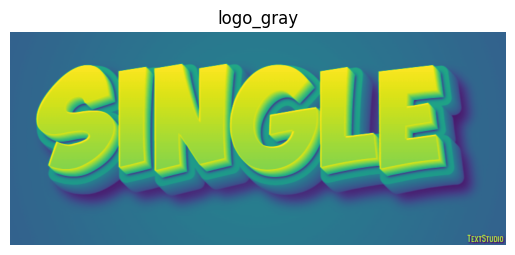

In [30]:
# Convert logo to grayscale
logo_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.imshow(logo_gray)
plt.title("logo_gray")
plt.axis('off')
plt.show()


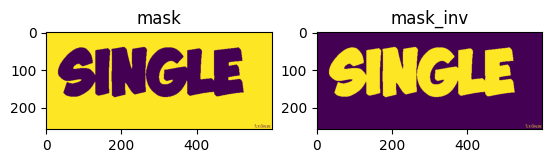

In [44]:
# Create mask where logo is not white
_, mask = cv2.threshold(logo_gray, 200, 255, cv2.THRESH_BINARY_INV)
# Invert mask
mask_inv = cv2.bitwise_not(mask)

plt.subplot(1,2,1); plt.imshow(mask); plt.title("mask")
plt.subplot(1,2,2); plt.imshow(mask_inv); plt.title("mask_inv")
plt.show()

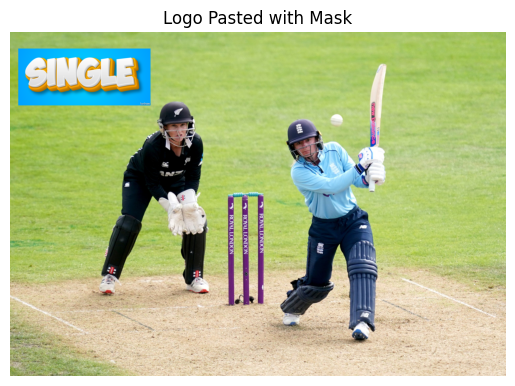

In [32]:
# Create mask where logo is not white
_, mask = cv2.threshold(logo_gray, 200, 255, cv2.THRESH_BINARY_INV)
# Invert mask
mask_inv = cv2.bitwise_not(mask)

# Define ROI in background
roi = img1[y:y+rows, x:x+cols]

# Black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Take only region of logo from logo image
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

# Combine both images
dst = cv2.add(img1_bg, img2_fg)

# Replace ROI back in the background image
img1[y:y+rows, x:x+cols] = dst

plt.imshow(img1)
plt.title("Logo Pasted with Mask")
plt.axis('off')
plt.show()


### 🧪 Step 4: Image Blending (Weighted Addition)
If you want smooth blending (like transparency or overlays)


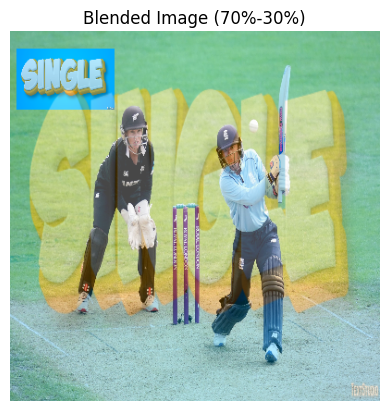

In [33]:
# Resize both to the same size
img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

# Blend using weighted sum
blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.imshow(blended)
plt.title("Blended Image (70%-30%)")
plt.axis('off')
plt.show()

### 

# Combine Masking + Blending

### Setup

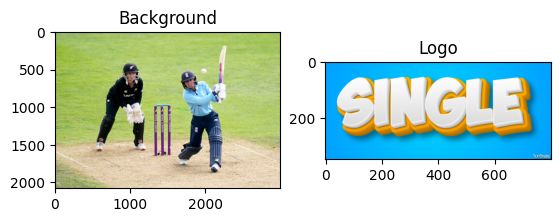

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load background and logo
background = cv2.imread('cricket-batter.jpg')
logo = cv2.imread('single-logo.png')

# Convert BGR → RGB for plotting
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1); plt.imshow(background); plt.title("Background")
plt.subplot(1,2,2); plt.imshow(logo); plt.title("Logo")
plt.show()


### 🧩 Step 2: Resize the Logo and Choose Position

Let’s place it in the bottom-right corner of the background.

In [46]:
# Resize logo to 1/5th of background width
h_bg, w_bg = background.shape[:2]
scale = 5
logo_width = w_bg // scale
logo_height = int(logo.shape[0] * (logo_width / logo.shape[1]))
logo = cv2.resize(logo, (logo_width, logo_height))

# Position: bottom-right
x = w_bg - logo_width - 20   # 20 px margin
y = h_bg - logo_height - 20

### 🎭 Step 3: Create Mask from Logo
If the logo has white or light background, we’ll remove it cleanly.

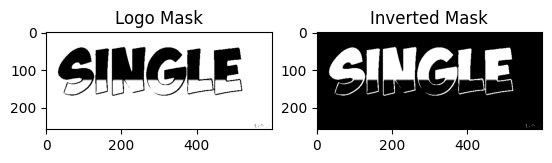

In [47]:
# Convert to grayscale
logo_gray = cv2.cvtColor(logo, cv2.COLOR_RGB2GRAY)

# Create mask where logo pixels are not white
_, mask = cv2.threshold(logo_gray, 230, 255, cv2.THRESH_BINARY_INV)

# Invert mask
mask_inv = cv2.bitwise_not(mask)

plt.subplot(1,2,1); plt.imshow(mask, cmap='gray'); plt.title("Logo Mask")
plt.subplot(1,2,2); plt.imshow(mask_inv, cmap='gray'); plt.title("Inverted Mask")
plt.show()


### ⚙️ Step 4: Prepare Background ROI

In [48]:
# Define ROI in background
roi = background[y:y+logo_height, x:x+logo_width]

# Black-out the logo area in ROI
bg_part = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Extract only logo region
logo_part = cv2.bitwise_and(logo, logo, mask=mask)

### 💡 Step 5: Blend the Two Images (Semi-Transparent Logo)

You can use weighted blending to make the logo partially transparent.

In [50]:
alpha = 0.6  # logo transparency
beta = 1 - alpha

# Combine both parts
combined = cv2.addWeighted(bg_part, beta, logo_part, alpha, 0)

# Replace the combined ROI back to the background
result = background.copy()
result[y:y+logo_height, x:x+logo_width] = combined

### 🖼️ Step 6: Display Result

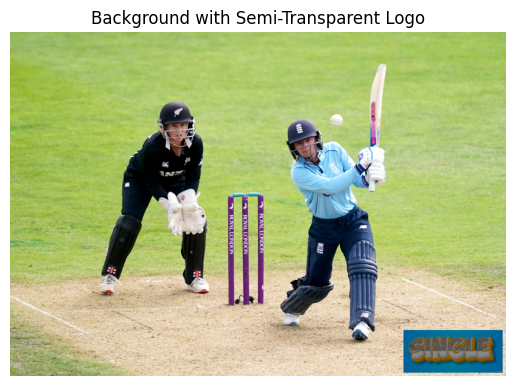

In [51]:
plt.imshow(result)
plt.title("Background with Semi-Transparent Logo")
plt.axis('off')
plt.show()

## Now let’s make your semi-transparent logo overlay fully dynamic
### Meaning it will automatically:

Scale itself based on background size, and position itself neatly in the bottom-right corner, regardless of image dimensions.

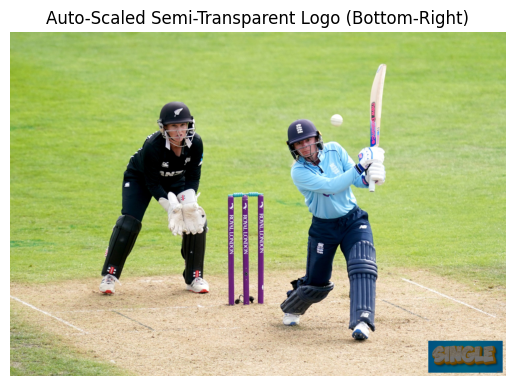

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_logo(background_path, logo_path, scale_factor=0.1, opacity=0.6, margin=20):
    # --- Load images ---
    bg = cv2.imread(background_path)
    logo = cv2.imread(logo_path)
    bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
    logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

    h_bg, w_bg = bg.shape[:2]

    # --- Dynamically resize logo ---
    logo_width = int(w_bg * scale_factor)
    logo_height = int(logo.shape[0] * (logo_width / logo.shape[1]))
    logo = cv2.resize(logo, (logo_width, logo_height))

    # --- Create logo mask to remove white background ---
    logo_gray = cv2.cvtColor(logo, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(logo_gray, 230, 255, cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(mask)

    # --- Define ROI (bottom-right corner) ---
    x = w_bg - logo_width - margin
    y = h_bg - logo_height - margin
    roi = bg[y:y+logo_height, x:x+logo_width]

    # --- Prepare masked regions ---
    bg_part = cv2.bitwise_and(roi, roi, mask=mask_inv)
    logo_part = cv2.bitwise_and(logo, logo, mask=mask)

    # --- Blend the two ---
    blended = cv2.addWeighted(bg_part, 1-opacity, logo_part, opacity, 0)

    # --- Replace ROI in original image ---
    result = bg.copy()
    result[y:y+logo_height, x:x+logo_width] = blended

    return result

# --- Example Usage ---
output = add_logo('cricket-batter.jpg', 'single-logo.png', scale_factor=0.15, opacity=0.5)

plt.imshow(output)
plt.title("Auto-Scaled Semi-Transparent Logo (Bottom-Right)")
plt.axis('off')
plt.show()


### Add a text watermark.
Extend the function next so it can add a text watermark (like a timestamp or signature) along with the logo — also dynamically scaled and blended

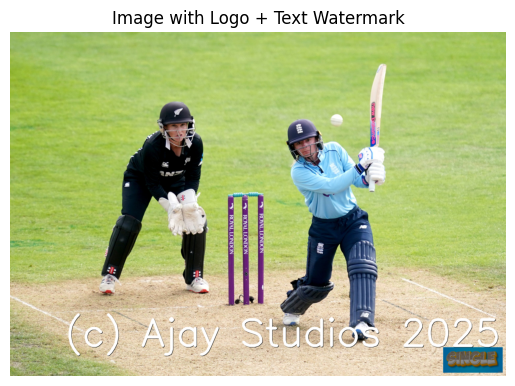

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_logo_and_text(
    background_path,
    logo_path,
    scale_factor=0.1,
    opacity=0.6,
    text="© MyBrand",
    font_scale_factor=0.002,
    margin=20
):
    # --- Load and convert ---
    bg = cv2.imread(background_path)
    logo = cv2.imread(logo_path)
    bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
    logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

    h_bg, w_bg = bg.shape[:2]

    # --- Dynamically resize logo ---
    logo_width = int(w_bg * scale_factor)
    logo_height = int(logo.shape[0] * (logo_width / logo.shape[1]))
    logo = cv2.resize(logo, (logo_width, logo_height))

    # --- Create mask (remove white background) ---
    logo_gray = cv2.cvtColor(logo, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(logo_gray, 230, 255, cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(mask)

    # --- Define ROI for logo (bottom-right corner) ---
    x = w_bg - logo_width - margin
    y = h_bg - logo_height - margin
    roi = bg[y:y+logo_height, x:x+logo_width]

    # --- Masked blend ---
    bg_part = cv2.bitwise_and(roi, roi, mask=mask_inv)
    logo_part = cv2.bitwise_and(logo, logo, mask=mask)
    blended = cv2.addWeighted(bg_part, 1-opacity, logo_part, opacity, 0)
    result = bg.copy()
    result[y:y+logo_height, x:x+logo_width] = blended

    # --- Add Text Watermark (above or beside logo) ---
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = w_bg * font_scale_factor
    thickness = int(font_scale * 2)
    
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    text_x = w_bg - text_size[0] - margin
    text_y = y - 10  # just above logo

    # --- Shadow (for visibility) ---
    cv2.putText(result, text, (text_x+2, text_y+2), font, font_scale, (0,0,0), thickness+1, cv2.LINE_AA)
    # --- Main text ---
    cv2.putText(result, text, (text_x, text_y), font, font_scale, (255,255,255), thickness, cv2.LINE_AA)

    return result


# --- Example Usage ---
output = add_logo_and_text(
    'cricket-batter.jpg',
    'single-logo.png',
    scale_factor=0.12,   # logo size relative to background
    opacity=0.6,         # transparency
    text="(c) Ajay Studios 2025",  # your brand or timestamp
    font_scale_factor=0.0025     # scales text size with image
)

plt.imshow(output)
plt.title("Image with Logo + Text Watermark")
plt.axis('off')
plt.show()
